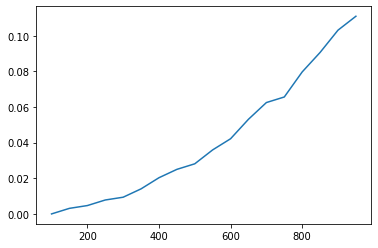

In [17]:
import numpy as np
from random import randint
import time
import matplotlib.pyplot as plt
import numba as nb

def bubble_sort(a,N): # сортирвока по возрастанию
    for i in range(N-1):
        for j in range(N-i-1):
            if a[j]>a[j+1]:
                temp = a[j]
                a[j] = a[j+1]
                a[j+1] = temp
    return a

# N - quantity of elements in list
def avg_time(N):
    N_array = 10 # quantity of lists in array
    array = [] # массив хранящий времена для каждого списка
    
    for k in range(N_array):
        lst = []
        for i in range(N):
            lst.append(randint(10**6,10**7))

        start_time = time.time()
        bubble_sort(lst,N)
        end_time = time.time()
        array.append(end_time-start_time)
        
    sum = 0
    for i in range(len(array)):
        sum += array[i]

    average_time = sum/len(array)
    return average_time


Num = [i*50 for i in range(2,20)]
t_array = [avg_time(i) for i in Num]
    
plt.plot(Num,t_array) # построить ещё график в логарифмическом масштабе
        
    

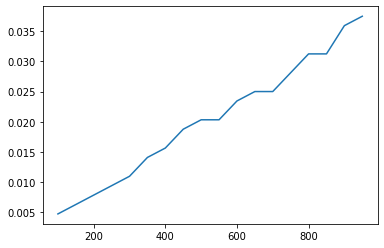

In [26]:
def arithmetic_sort(A,N): # N - количество элементов в списке [a], который хотим отсортировать
    length = len(str(max(A)))
    rang = 10
    c=[[] for i in range(rang)]
    for k in range(length):
        for i in range(rang):
            for j in range(N):
                if i==A[j]//10**k%10:
                    c[i].append(A[j])
        A=[]
        for i in range(rang):
            A=A+c[i] 
        c=[[] for i in range(rang)]
    
    return A


# N - quantity of elements in list
def avg_time_arithmetic_sort(N):
    array = []
    N_array = 10 # quantity of lists in array
    for k in range(N_array):
        lst = []
        for i in range(N):
            lst.append(randint(10**6,10**7))
        start_time = time.time()
        arithmetic_sort(lst,len(lst)) 
        end_time = time.time()
        array.append(end_time-start_time)
        
    sum = 0
    for i in range(len(array)):
        sum += array[i]
        
    average_time = sum/len(array)
    return average_time


Num2 = [i*50 for i in range(2,20)]
t2_array = [avg_time_arithmetic_sort(i) for i in Num2]
    
plt.plot(Num2,t2_array)

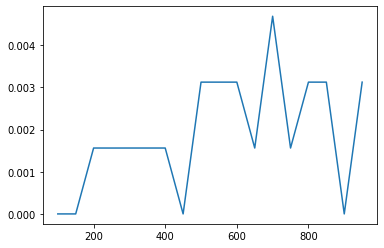

In [21]:
def fox(A):
    length = len(str(max(A)))
    rang = 10
    for i in range(length):
        B = [[] for k in range(rang)] #список длины range, состоящий из пустых списков
        for x in A:
            figure = x // 10**i % 10
            B[figure].append(x)
        A = []
        for k in range(rang):
            A = A + B[k]
    return A

def avg_time_fox(N):
    N_array = 10 # quantity of lists in array
    array = []
    for k in range(N_array):
        lst = []
        for i in range(N):
            lst.append(randint(1000000,10000000))

        start_time = time.time()
        fox(lst) 
        end_time = time.time()
        array.append(end_time-start_time)
    sum = 0
    for i in range(len(array)):
        sum += array[i]

    average_time = sum/len(array)
    return average_time


Num3 = [i*50 for i in range(2,20)]
t3_array = [avg_time_fox(i) for i in Num3]
    
plt.plot(Num3,t3_array)